In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helper import get_poly_pred
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Read the data
df = pd.read_csv('../../data_sets/poly.csv')

#Take a look
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


In [3]:
#Get the column values as numpy arrays
x = df[['x']].values
y = df['y']

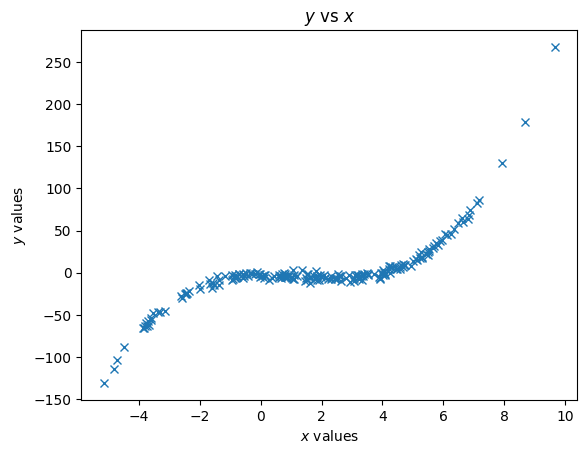

In [4]:
# Helper code to plot x & y to visually inspect the data
fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$')
plt.show()

In [5]:
#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=22)

#Inicialize a linear model
model = LinearRegression()

#Fit the model on the train data
model.fit(x_train, y_train)

#Get the predictions on the test data using trained model
y_lin_pred = model.predict(x_test)

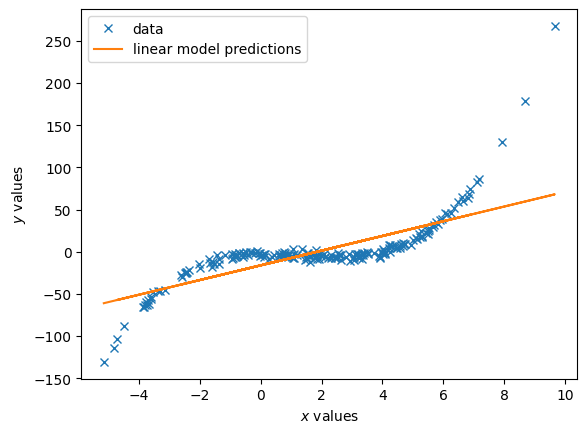

In [6]:
# Helper code to plot x & y to visually inspect the data
fig, ax = plt.subplots()
ax.plot(x,y,'x', label='data')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.plot(x_test, y_lin_pred, label='linear model predictions')
plt.legend()

In [7]:
# Guess the correct polynomial degree based on the above graph
guess_degree = 3

# Predict on the entire polynomial transformed test data using helper function.
y_poly_pred = get_poly_pred(x_train, x_test, y_train, degree=guess_degree)

(160, 1) (40, 1) (160,)


In [8]:
#Helper code to visualise the results
idx = np.argsort(x_test[:, 0])
x_test = x_test[idx]

#Use the above index to get the appropriate values for 'y' vales corresponding to sorted test data
y_test = y_test.to_numpy()[idx]

#Linear predicted values
y_lin_pred = y_lin_pred[idx]

#Non-linear predicter values
y_poly_pred = y_poly_pred[idx]

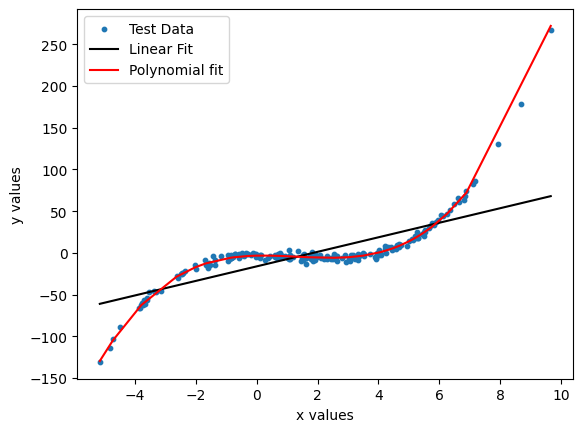

In [11]:
#Plot x & y values using plt.scatter
plt.scatter(x, y, s=10, label='Test Data')

#Plot a linear regression fit curve
plt.plot(x_test, y_lin_pred, label='Linear Fit', color='k')

#Plot the polynomial regression fit curve
plt.plot(x_test, y_poly_pred, label='Polynomial fit', color='red')

#Assigning labels to the axes
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.show()

In [12]:
#Calculate the residual values for the polynomial model
poly_residuals = y_test - y_poly_pred

In [13]:
#Calculate the residual values for the polynomial model
lin_residuals = y_test - y_lin_pred

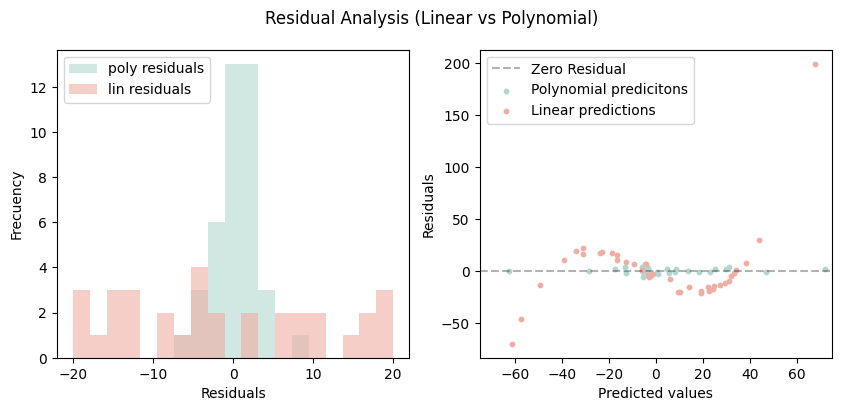

In [28]:
#Ploting the histograms of the residuals for the two cases

#Distribution of residuals
fig, ax = plt.subplots(1,2, figsize=(10,4))
bins = np.linspace(start=-20, stop=20, num=20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frecuency')

#Plot the histograms for the polynomial regression
ax[0].hist(poly_residuals, bins, label='poly residuals', color='#B2D7D0', alpha=0.6)

#Plot the histograms for the lineal regression
ax[0].hist(lin_residuals, bins, label='lin residuals', color='#EFAEA4', alpha=0.6)

ax[0].legend(loc = 'upper left')

#Distribution of predicted values with the residuals
ax[1].hlines(0, -75, 75, color='k', ls='--', alpha=0.3, label='Zero Residual')
ax[1].scatter(y_poly_pred, poly_residuals, s=10, color='#B2D7D0', label='Polynomial predicitons')
ax[1].scatter(y_lin_pred, lin_residuals, s=10, color='#EFAEA4', label='Linear predictions')
ax[1].set_xlim(-75, 75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
ax[1].legend(loc = 'upper left')
fig.suptitle('Residual Analysis (Linear vs Polynomial)')
plt.show()
